<a href="https://colab.research.google.com/github/Adricarpin/TensorFlow-notebooks/blob/master/NLP/IA_spanish_poetry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spanish Poetry

In this notebook I would try to make poetry with a device designed to process 0s and 1s :)

In [1]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [2]:
! wget https://raw.githubusercontent.com/Adricarpin/TensorFlow-notebooks/master/NLP/Data/poetry-lorca-becquer.txt

--2021-11-07 14:04:21--  https://raw.githubusercontent.com/Adricarpin/TensorFlow-notebooks/master/NLP/Data/poetry-lorca-becquer.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 96613 (94K) [text/plain]
Saving to: ‘poetry-lorca-becquer.txt’

poetry-lorca-becque 100%[===================>]  94.35K  --.-KB/s    in 0.01s   

2021-11-07 14:04:21 (6.70 MB/s) - ‘poetry-lorca-becquer.txt’ saved [96613/96613]



In [3]:
# this dataset can be found on the GitHub Repository
data = open('poetry-lorca-becquer.txt').read()


In [4]:
data

'Viento del Sur,\nmoreno, ardiente,\nllegas sobre mi carne,\ntiayéndome semilla\nde brillantes\nmiradas, empapado\nde azahares.\nPones roja la luna\ny sollozantes los álamos cautivos, pero vienes\n¡demasiado tarde!\n¡ya he enrollado la noche de mi cuento\nen el estante!\nSin ningún viento,\n¡hazme caso!\ngira, corazón;\ngira, corazón.\nAire del Norte,\n¡oso blanco del viento!\nllegas sobre mi carne\ntembloroso de auroras\nboreales,\ncon tu capa de espectros\ncapitanes,\ny riyéndote a gritos\ndel Dante,\n¡oh pulidor de estrellas!\npero vienes demasiado tarde.\nMi almario está musgoso\ny he perdido la llave.\nSin ningún viento,\n¡hazme caso!\ngira, corazón;\ngira, corazón.\nBrisas, gnomos y vientos\nde ninguna parte.\nMosquitos de la rosa\nde pétalos pirámides.\nAlisios destetados\nentre los rudos árboles,\nflautas en la tormenta,\n¡dejadme !\ntiene recias cadenas\nmi recuerdo,\ny está cautiva el ave\nque dibuja con trinos\nla tarde.\nLas cosas que se van no vuelven nunca\ntodo el mundo 

In [ ]:
corpus = data.lower().split("\n")


In [ ]:
corpus[:3]

['viento del sur,', 'moreno, ardiente,', 'llegas sobre mi carne,']

In [ ]:
# SET TOKENIZER
tokenizer = Tokenizer()

tokenizer.fit_on_texts(corpus)

total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

{'de': 1, 'la': 2, 'el': 3, 'y': 4, 'que': 5, 'en': 6, 'los': 7, 'del': 8, 'las': 9, 'a': 10, 'un': 11, 'mi': 12, 'con': 13, 'se': 14, 'tu': 15, 'es': 16, 'al': 17, 'como': 18, 'yo': 19, 'por': 20, 'una': 21, 'no': 22, 'corazón': 23, 'sobre': 24, 'me': 25, 'sin': 26, 'tus': 27, 'lo': 28, 'su': 29, 'alma': 30, 'te': 31, '¡oh': 32, 'agua': 33, 'sus': 34, 'mis': 35, 'ojos': 36, 'luz': 37, 'noche': 38, 'cielo': 39, 'amor': 40, 'estrellas': 41, 'tristeza': 42, 'para': 43, 'si': 44, 'ha': 45, 'azul': 46, 'tiene': 47, 'sol': 48, 'ya': 49, '¿qué': 50, 'sombra': 51, 'cuando': 52, 'luna': 53, 'pero': 54, 'tierra': 55, 'más': 56, 'niños': 57, 'oro': 58, 'entre': 59, 'son': 60, 'tú': 61, 'dolor': 62, 'fuente': 63, 'sangre': 64, 'qué': 65, 'soy': 66, 'ni': 67, 'viento': 68, 'tarde': 69, 'vida': 70, 'estrella': 71, 'tan': 72, 'mientras': 73, 'nieve': 74, 'muy': 75, 'dulce': 76, 'lejos': 77, 'dos': 78, 'silencio': 79, 'muerte': 80, 'nos': 81, 'va': 82, 'gran': 83, 'aire': 84, 'todo': 85, 'siempre': 8

In [ ]:
# PREPARE DATASET
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

In [ ]:
input_sequences[:10]

[[68, 8],
 [68, 8, 1479],
 [933, 261],
 [934, 24],
 [934, 24, 12],
 [934, 24, 12, 100],
 [1480, 1481],
 [1, 1482],
 [176, 1483],
 [1, 1484]]

In [ ]:
max_sequence_len = max([len(x) for x in input_sequences])
max_sequence_len

13

In [ ]:
input_sequences = pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre')

In [ ]:
# SET TRAIN_X AND TRAIN_Y
train_X, train_y = input_sequences[:,:-1],input_sequences[:,-1]

In [ ]:
# TRAIN_Y TO CATEGORICAL
train_y = tf.keras.utils.to_categorical(train_y, num_classes=total_words)

In [ ]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="accuracy",  
                                                 factor=0.2, 
                                                 patience=1, 
                                                 verbose=1, 
                                                 min_lr=1e-7)

In [ ]:
# MODEL
model = Sequential()
model.add(Embedding(total_words, 32, input_length=max_sequence_len-1)) 
model.add(Bidirectional(LSTM(128)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history = model.fit(train_X, train_y, epochs=20, verbose=1, callbacks=[reduce_lr])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/20
417/417 [==============================] - 10s 15ms/step - loss: 6.8792 - accuracy: 0.0619
Epoch 2/20
417/417 [==============================] - 6s 15ms/step - loss: 5.9351 - accuracy: 0.1030
Epoch 3/20
417/417 [==============================] - 6s 15ms/step - loss: 5.1811 - accuracy: 0.1326
Epoch 4/20
417/417 [==============================] - 6s 14ms/step - loss: 4.3481 - accuracy: 0.1770
Epoch 5/20
417/417 [==============================] - 6s 14ms/step - loss: 3.5008 - accuracy: 0.2619
Epoch 6/20
417/417 [==============================] - 6s 14ms/step - loss: 2.7649 - accuracy: 0.3794
Epoch 7/20
417/417 [==============================] - 6s 14ms/step - loss: 2.2227 - accuracy: 0.4916
Epoch 8/20
417/417 [==============================] - 6s 14ms/step - loss: 1.8581 - accuracy: 0.5752
Epoch 9/20
417/417 [==============================] - 6s 14ms/step - loss: 1.6134 - accuracy: 0.6300
Epoch 10/20
417/417 [==============================] - 6s 14ms/step - loss: 1.4671 - accur

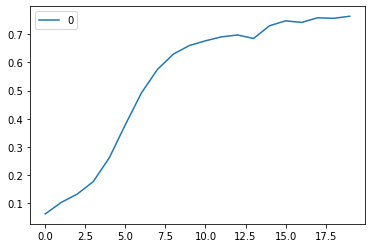

In [ ]:
import pandas as pd

pd.DataFrame(history.history['accuracy']).plot()

In [ ]:
# MAKE PREDICTIONS

seed_text = "al amanecer"
next_words = 30
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predict_x=model.predict(token_list, verbose=0) 
    predicted=np.argmax(predict_x,axis=1)

    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

al amanecer sentir en tus labios un aliento dormida de los reinos lo suaves del cielo suaves suaves suaves bajo el agua la de cadencia y casta de luna no ha dormido
